# Flat example

A flat surface define by $z=c$ is used to test the quality of the layer extraction for both the triangle rotation approach and the triangle mapping approach.

In [1]:
import numpy as np
import unfolding
from unfolding._utils import flat
from matplotlib import pyplot as plt

In [2]:
image, label, verts, faces = flat()

# extract the layers with one method
layers1 = unfolding.unfold_layers(
    verts, faces, verts[:,:2], faces, np.arange(verts.shape[0]), image, n_layers=1
)

# extract the layers with another method
layers2 = unfolding.extract_layers(verts, verts[:,:2], faces, image, layers=np.linspace(-1,1,3))

100%|██████████| 32/32 [00:04<00:00,  6.63it/s]


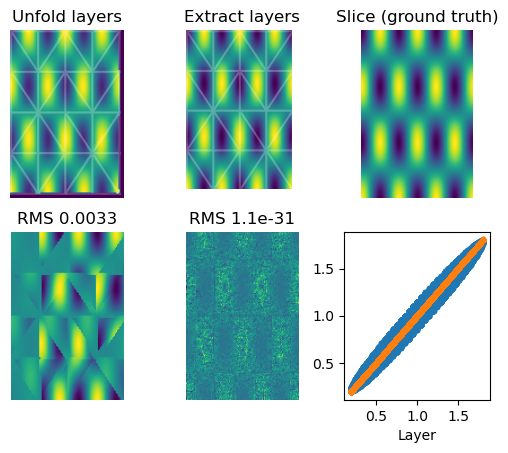

In [4]:
def rms_error(x,y):
    return np.square(x-y).mean()

plt.subplot(231)
plt.imshow(layers1[..., 1])
plt.triplot(
    verts[:, 1] - verts[:, 1].min() + 0.5,
    verts[:, 0] - verts[:, 0].min() + 0.5,
    triangles=faces,color='w',alpha=0.25
)
plt.axis('off')
plt.title('Unfold layers')
plt.subplot(232)
plt.imshow(layers2[..., 1])
plt.triplot(
    verts[:, 1] - verts[:, 1].min() + 0.5,
    verts[:, 0] - verts[:, 0].min() + 0.5,
    triangles=faces,color='w',alpha=0.25
)
plt.axis('off')
plt.title('Extract layers')
plt.subplot(233)
plt.imshow(image[...,60])
plt.axis('off')
plt.title('Slice (ground truth)')
plt.subplot(234)
plt.imshow(layers1[:-5,:-5,1] - image[:layers1.shape[0],:layers1.shape[1],60])
plt.axis('off')
rms1 = rms_error(layers1[:-5,:-5,1] , image[:layers1.shape[0],:layers1.shape[1],60])
plt.title(f'RMS {rms1:.2g}')
plt.subplot(235)
plt.imshow(layers2[:,:,1] - image[:layers2.shape[0],:layers2.shape[1],60])
plt.axis('off')
rms2 = rms_error(layers2[:,:,1] , image[:layers2.shape[0],:layers2.shape[1],60])
plt.title(f'RMS {rms2:.2g}')
plt.subplot(236)
plt.plot(image[:layers1.shape[0],:layers1.shape[1],60].ravel(),layers1[:-5,:-5,1].ravel(),'.')
plt.plot(image[:layers2.shape[0],:layers2.shape[1],60].ravel(),layers2[:,:,1].ravel(),'.')
plt.xlabel('Image slice')
plt.xlabel('Layer')
plt.axis('tight');